# NeuralNetworks

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
# hyperparameter tuning ## To search for the most suitable parameters for the Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from yellowbrick import ROCAUC
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import confusion_matrix
import pydotplus


## Data Preparation

In [2]:
X_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/X_train.txt", header=None,  delim_whitespace=True)
y_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/y_train.txt", header=None, delim_whitespace=True )
X_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/X_test.txt", header=None, delim_whitespace=True )
y_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/y_test.txt", header=None, delim_whitespace=True )
subject_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/subject_train.txt", header=None, delim_whitespace=True )
features = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/features.txt", header=None, delim_whitespace=True )

In [3]:
feature = features
feature.drop(0,inplace=True, axis=1)

In [4]:
#inseriamo l'intestazione al dataset
lista=[]
feat_transpa = feature.transpose()
for i in range(561):
    lista.append(feat_transpa.iloc[0][i])
X_test.columns=lista    
X_train.columns=lista

In [5]:
# eliminiamo le colonne che contengono la stima mad in quanto quasi uguale a dev.std
stringa="mad()"
for col in X_train.columns:
    if(stringa in col):
        X_train.drop(labels=col, axis=1, inplace=True)
for col in X_test.columns:
    if(stringa in col):
        X_test.drop(labels=col, axis=1, inplace=True)
#for col in features:
#    if (stringa in col):
#        features.drop(labels=col,axis=1,inplace=True)

## Sklearn Multilayer Perceptron

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
hidden_layer_sizes = (100, 200,)

### Parameters

hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

activation {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
Activation function for the hidden layer.
* 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x
* 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
* 'relu', the rectified linear unit function, returns f(x) = max(0, x)

solver {'lbfgs', 'sgd', 'adam'}, default='adam'
The solver for weight optimization.
* 'lbfgs' is an optimizer in the family of quasi-Newton methods.
* 'sgd' refers to stochastic gradient descent.
* 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
The default solver 'adam' works pretty well on relatively large datasets (>= 1000 training samples) in terms of both training time and validation score. For small datasets, 'lbfgs' can converge faster and perform better.

alpha float, default=0.0001
L2 penalty (regularization term) parameter.

batch_size int, default='auto'
Size of minibatches for stochastic optimizers. If the solver is 'lbfgs', the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

learning_rate {'constant', 'invscaling', 'adaptive'}, default='constant'
Learning rate schedule for weight updates.
*'constant' is a constant learning rate given by 'learning_rate_init'.
*'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of *'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)
*'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.
Only used when solver='sgd'.

learning_rate_init double, default=0.001
The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

power_t double, default=0.5
The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to 'invscaling'. Only used when solver='sgd'.

max_iter int, default=200
Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations. For stochastic solvers ('sgd', 'adam'), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

shuffle bool, default=True
Whether to shuffle samples in each iteration. Only used when solver='sgd' or 'adam'.

random_state int, RandomState instance or None, default=None
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

tol float, default=1e-4
Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to 'adaptive', convergence is considered to be reached and training stops.

verbose bool, default=False
Whether to print progress messages to stdout.

warm_start bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

momentum float, default=0.9
Momentum for gradient descent update. Should be between 0 and 1. Only used when solver='sgd'.

early_stopping bool, default=False
Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. Only effective when solver='sgd' or 'adam'

validation_fraction float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True

beta_1 float, default=0.9
Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver='adam'

beta_2 float, default=0.999
Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver='adam'

epsilon float, default=1e-8
Value for numerical stability in adam. Only used when solver='adam'

n_iter_no_change int, default=10
Maximum number of epochs to not meet tol improvement. Only effective when solver='sgd' or 'adam'


### Attributes
loss_ float
The current loss computed with the loss function.

coefs_ list, length n_layers - 1
The ith element in the list represents the weight matrix corresponding to layer i.

intercepts_ list, length n_layers - 1
The ith element in the list represents the bias vector corresponding to layer i + 1.

n_iter_ int,
The number of iterations the solver has ran.

n_layers_ int
Number of layers.

n_outputs_ int
Number of outputs.

out_activation_ string
Name of the output activation function.

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train,  np.ravel(y_train))

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9528333898880217
F1-score [0.9657869  0.93558606 0.9528536  0.92791878 0.933082   0.99813433]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       496
           2       0.93      0.94      0.94       471
           3       0.99      0.91      0.95       420
           4       0.93      0.93      0.93       491
           5       0.94      0.93      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



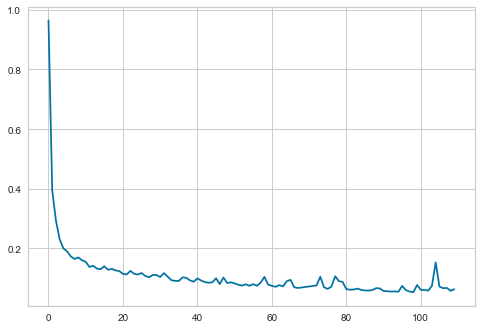

In [9]:
#Loss curve
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

parameter = {
    'hidden_layer_sizes': [(32,64), (128,64,32),  (150,50), (100)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

    #'hidden_layer_sizes': [(50,50), (100,100), (100,150), (150,50), (100,50)],


clf = GridSearchCV(MLPClassifier(), parameter, n_jobs=-1, cv=3)
clf.fit(X_train, np.ravel(y_train))

In [ ]:
y_pred = clf.predict(X_test)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(32,64),  learning_rate='constant', 
                    activation='logistic', solver= 'adam', momentum=1, batch_size=64, random_state=0)

clf.fit(X_train,  np.ravel(y_train))

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9572446555819477
F1-score [0.96850394 0.94994675 0.97080292 0.91932059 0.93369664 1.        ]
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.95      0.95      0.95       471
           3       0.99      0.95      0.97       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



## Keras Deep Neural Networks

In [11]:
#!pip install tensorflow

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
def build_model():
    
    n_feature = len(X_train.columns)
    model = Sequential()
    model.add(Dense(64, input_dim=n_feature, activation='sigmoid'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(72, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(80, activation='sigmoid'))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=50).history

Epoch 1/100
148/148 [==============================] - 2s 3ms/step - loss: 1.0483 - accuracy: 0.5008
Epoch 2/100
148/148 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8240
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9025
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9374
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9478
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9587
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.9574
Epoch 8/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9633
Epoch 9/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9718
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0799 - accura

In [17]:
model2 = build_model()
history2 = model2.fit(X_train, y_train, epochs=200, batch_size=50).history

Epoch 1/200
148/148 [==============================] - 1s 2ms/step - loss: 1.1358 - accuracy: 0.4902
Epoch 2/200
148/148 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8439
Epoch 3/200
148/148 [==============================] - 0s 1ms/step - loss: 0.1937 - accuracy: 0.9259
Epoch 4/200
148/148 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.9450
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9582
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9623
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9626
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9718
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9778
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0725 - accura

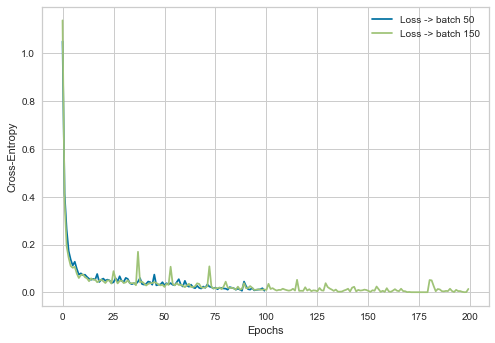

In [18]:
#Cross-entropy vs Epochs with different batch_size
plt.plot(history1['loss'], label='Loss -> batch 50')
plt.plot(history2['loss'], label='Loss -> batch 150')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [19]:
#Evaluate models
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

93/93 [==============================] - 0s 948us/step - loss: 0.2594 - accuracy: 0.9579
Loss 0.277543, Accuracy 0.946386
Loss 0.259418, Accuracy 0.957923


In [20]:
y_pred = model1.predict(X_test).astype(int)
y_pred
#print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
#print(classification_report(y_test, y_pred))

93/93 [==============================] - 0s 1ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
#Split to fit the model and perform it on 20% of training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

model3 = build_model()
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=50).history

Epoch 1/300
118/118 [==============================] - 2s 5ms/step - loss: 1.1411 - accuracy: 0.5110 - val_loss: 0.5201 - val_accuracy: 0.8131
Epoch 2/300
118/118 [==============================] - 0s 3ms/step - loss: 0.2947 - accuracy: 0.8924 - val_loss: 0.1589 - val_accuracy: 0.9449
Epoch 3/300
118/118 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.9407 - val_loss: 0.1123 - val_accuracy: 0.9606
Epoch 4/300
118/118 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.9529 - val_loss: 0.0968 - val_accuracy: 0.9694
Epoch 5/300
118/118 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9568 - val_loss: 0.0894 - val_accuracy: 0.9701
Epoch 6/300
118/118 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9655 - val_loss: 0.1038 - val_accuracy: 0.9599
Epoch 7/300
118/118 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9685 - val_loss: 0.1060 - val_accuracy: 0.9633

In [22]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

93/93 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.9494
Loss 0.277543, Accuracy 0.946386
Loss 0.259418, Accuracy 0.957923
Loss 0.650943, Accuracy 0.949440


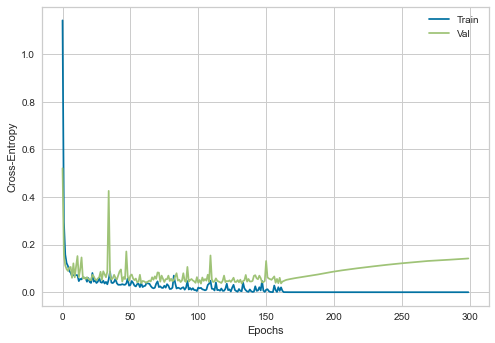

In [23]:
#Cross_Entropy Train & Validation Set
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

## Early Stopping with ModelCheckpoint

In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

The most relevant arguments are:

* monitor: quantity to be monitored
* patience: number of epochs with no improvement after which training will be stopped

In [25]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es,mc]).history

Epoch 1/100
589/589 [==============================] - 2s 2ms/step - loss: 0.7417 - accuracy: 0.6577 - val_loss: 0.2772 - val_accuracy: 0.9041
Epoch 2/100
589/589 [==============================] - 1s 2ms/step - loss: 0.2538 - accuracy: 0.9012 - val_loss: 0.1358 - val_accuracy: 0.9511
Epoch 3/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1727 - accuracy: 0.9357 - val_loss: 0.1278 - val_accuracy: 0.9531
Epoch 4/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1231 - accuracy: 0.9549 - val_loss: 0.1806 - val_accuracy: 0.9286
Epoch 5/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9572 - val_loss: 0.1589 - val_accuracy: 0.9375
Epoch 6/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1087 - accuracy: 0.9648 - val_loss: 0.1181 - val_accuracy: 0.9545
Epoch 7/100
589/589 [==============================] - 1s 2ms/step - loss: 0.0920 - accuracy: 0.9665 - val_loss: 0.1352 - val_accuracy: 0.9565

In [26]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

93/93 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.9420
Loss 0.277543, Accuracy 0.946386
Loss 0.259418, Accuracy 0.957923
Loss 0.650943, Accuracy 0.949440
Loss 0.342988, Accuracy 0.941975


### L2 Regularization

In [27]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [28]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                    batch_size=10, callbacks=[es,mc]).history

Epoch 1/100
589/589 [==============================] - 3s 2ms/step - loss: -38.1448 - accuracy: 0.1704 - val_loss: -39.9739 - val_accuracy: 0.1516
Epoch 2/100
589/589 [==============================] - 1s 2ms/step - loss: -39.5309 - accuracy: 0.1705 - val_loss: -40.4986 - val_accuracy: 0.1516
Epoch 3/100
589/589 [==============================] - 2s 3ms/step - loss: -39.8778 - accuracy: 0.1705 - val_loss: -40.7196 - val_accuracy: 0.1516
Epoch 4/100
589/589 [==============================] - 2s 3ms/step - loss: -39.8951 - accuracy: 0.1705 - val_loss: -40.6729 - val_accuracy: 0.1516
Epoch 5/100
589/589 [==============================] - 2s 3ms/step - loss: -39.9765 - accuracy: 0.1705 - val_loss: -40.7416 - val_accuracy: 0.1516
Epoch 6/100
589/589 [==============================] - 1s 2ms/step - loss: -40.0314 - accuracy: 0.1705 - val_loss: -40.7862 - val_accuracy: 0.1516
Epoch 7/100
589/589 [==============================] - 1s 2ms/step - loss: -40.0697 - accuracy: 0.1705 - val_loss: -40

### Dropout

In [29]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [30]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es,mc]).history

Epoch 1/100
589/589 [==============================] - 2s 2ms/step - loss: -39.7812 - accuracy: 0.1695 - val_loss: -40.8962 - val_accuracy: 0.1516
Epoch 2/100
589/589 [==============================] - 1s 2ms/step - loss: -40.1625 - accuracy: 0.1705 - val_loss: -40.8962 - val_accuracy: 0.1516
Epoch 3/100
589/589 [==============================] - 1s 2ms/step - loss: -40.1591 - accuracy: 0.1705 - val_loss: -40.8962 - val_accuracy: 0.1516
Epoch 4/100
589/589 [==============================] - 1s 2ms/step - loss: -40.1625 - accuracy: 0.1705 - val_loss: -40.8962 - val_accuracy: 0.1516
Epoch 5/100
589/589 [==============================] - 1s 2ms/step - loss: -40.1625 - accuracy: 0.1705 - val_loss: -40.8962 - val_accuracy: 0.1516
Epoch 6/100
589/589 [==============================] - 1s 2ms/step - loss: -40.1625 - accuracy: 0.1705 - val_loss: -40.8962 - val_accuracy: 0.1516
Epoch 7/100
589/589 [==============================] - 1s 2ms/step - loss: -40.1625 - accuracy: 0.1705 - val_loss: -40

In [31]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

93/93 [==============================] - 0s 1ms/step - loss: -39.3106 - accuracy: 0.1683


In [32]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.216058, Accuracy 0.944011
Loss -39.310646, Accuracy 0.168307
Loss -39.310646, Accuracy 0.168307


## Deep Neural network with Hyper-parameter tuning

In [33]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [34]:
def build_model1(hp):
    
    model = keras.Sequential()
    n_feature = X_train.shape[1]    
    #model.add(tf.keras.layers.Dense(8, activation='tanh',input_shape=(n_feature,)))
    
    for i in range(hp.Int('layers',2,6)):
        if (i==0):
            model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), 8, 128, step=8), 
            activation=hp.Choice('act_'+ str(i), ['relu', 'tanh','sigmoid']),input_shape=(n_feature,)))
        else:
            model.add(tf.keras.layers.Dense( 
                units=hp.Int('units_' + str(i), 8, 128, step=8), 
                activation=hp.Choice('act_'+ str(i), ['relu', 'tanh','sigmoid'])))
    
    #NB Impostare numero di neuroni ultimo layer = N_class + 1
    model.add(tf.keras.layers.Dense(7, activation='softmax'))
    model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [38]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model1,
    objective='val_accuracy', #massimizziamo la validation accuracy
    max_trials=10,
    executions_per_trial=2,
    directory='prove',
    project_name='final_ultimatex')

INFO:tensorflow:Reloading Oracle from existing project prove\final_ultimatex\oracle.json
INFO:tensorflow:Reloading Tuner from prove\final_ultimatex\tuner0.json


In [39]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': None}
act_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': None}
act_3 (Choice)
{'default': 'relu', 'conditions': [], 'val

In [40]:
tuner.search(X_train,y_train,
            epochs=20,
            validation_split=0.1)

Trial 10 Complete [00h 00m 17s]
val_accuracy: 0.9872665405273438

Best val_accuracy So Far: 0.9898132681846619
Total elapsed time: 00h 01m 59s
INFO:tensorflow:Oracle triggered exit


In [41]:
tuner.results_summary()

Results summary
Results in prove\final_ultimatex
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 3
units_0: 56
act_0: tanh
units_1: 24
act_1: sigmoid
units_2: 96
act_2: tanh
units_3: 40
act_3: sigmoid
units_4: 48
act_4: tanh
Score: 0.9898132681846619
Trial summary
Hyperparameters:
layers: 5
units_0: 104
act_0: tanh
units_1: 80
act_1: relu
units_2: 8
act_2: relu
units_3: 8
act_3: relu
units_4: 8
act_4: relu
Score: 0.9889643490314484
Trial summary
Hyperparameters:
layers: 5
units_0: 88
act_0: relu
units_1: 8
act_1: relu
units_2: 120
act_2: sigmoid
units_3: 112
act_3: sigmoid
units_4: 8
act_4: tanh
Score: 0.9872665703296661
Trial summary
Hyperparameters:
layers: 2
units_0: 8
act_0: relu
units_1: 48
act_1: relu
Score: 0.9872665405273438
Trial summary
Hyperparameters:
layers: 4
units_0: 24
act_0: relu
units_1: 32
act_1: sigmoid
units_2: 88
act_2: relu
units_3: 80
act_3: tanh
units_4: 72
act_4: relu
units_5: 40
act_5: tanh
Score: 0.9872665405273438
Trial summary
Hyperparameters

In [42]:
# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]
best_model

In [43]:
#Split to fit the model and perform it on 20% of training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [44]:
#history1 è un dizionario con keys "loss" e "accuracy" e cada valore corrispondente per ogni epoca
history1 = best_model.fit(X_train,y_train, epochs=200, batch_size=10).history #, validation_data=(X_val,y_val)

Epoch 1/200
530/530 [==============================] - 2s 2ms/step - loss: 0.0987 - accuracy: 0.9603
Epoch 2/200
530/530 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9690
Epoch 3/200
530/530 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9696
Epoch 4/200
530/530 [==============================] - 1s 1ms/step - loss: 0.0675 - accuracy: 0.9754
Epoch 5/200
530/530 [==============================] - 1s 2ms/step - loss: 0.0576 - accuracy: 0.9775
Epoch 6/200
530/530 [==============================] - 1s 1ms/step - loss: 0.0572 - accuracy: 0.9775
Epoch 7/200
530/530 [==============================] - 1s 2ms/step - loss: 0.0532 - accuracy: 0.9809
Epoch 8/200
530/530 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9762
Epoch 9/200
530/530 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9769
Epoch 10/200
530/530 [==============================] - 1s 2ms/step - loss: 0.0462 - accura

In [45]:
history2 = best_model.fit(X_train, y_train, epochs=200, batch_size=50).history

Epoch 1/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9985
Epoch 2/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9992
Epoch 3/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 4/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 5/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 6/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 7/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 8/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 9/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 10/200
106/106 [==============================] - 0s 2ms/step - loss: 0.0065 - accura

In [58]:
print("Accuracy 1st model: ", history1['accuracy'][-1])
print("Loss 1st model: ", history1['loss'][-1])

print("Accuracy 2nd model: ", history2['accuracy'][-1])
print("Loss 2nd model: ",history2['loss'][-1])

Accuracy 1st model:  0.9933862686157227
Loss 1st model:  0.01754075288772583
Accuracy 2nd model:  0.999811053276062
Loss 2nd model:  0.0013032970018684864


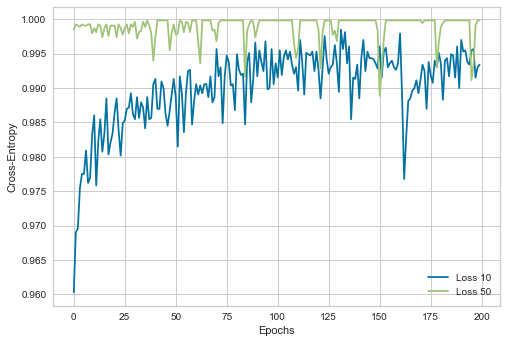

In [59]:
#Cross_entropy with different Batch_size

plt.plot(history1['accuracy'], label='Loss 10')
plt.plot(history2['accuracy'], label='Loss 50')

plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

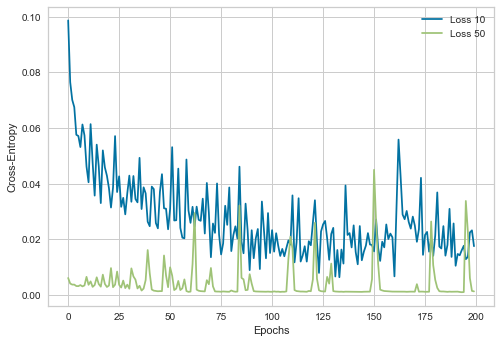

In [60]:
#Cross_entropy with different Batch_size

plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')

plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()